# Monte Carlo
---

We can estimate integrals using Monte Carlo method using random sampling:

This is useful for esimating the value of a complex integral or sample from high-dimensional or irregular domains

$$
\mathbb{E}[f(x)] = \int_D f(x) p(x) \, dx
$$
Where p(x) is the pdf, we can get an approximation
$$
\mathbb{E}[f(x)] \approx \frac{1}{N} \sum_{i=1}^N f(x_i),
$$

When estimation converges to infinity it gets close to the expectation

If we don't have p(x) we can use a uniform sample

For a uniform distribution over the interval \([a, b]\), the probability density function p(x) is:

$$
p(x) = \frac{1}{b - a}, \quad \text{for } x \in [a, b].
$$

Using Monte Carlo sampling with N samples \( x_i \) uniformly drawn from \([a, b]\), the integral is approximated as:

$$
\int_a^b f(x) \, dx \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i).
$$

Using this lets estimate pi where
$$
A = \pi r^2
$$
Alternatively as an integral
$$
I = \int_{-r}^{r} \int_{-r}^{r} \mathbf{1}_{x^2 + y^2 \leq r^2} \, dy \, dx
$$

$$
I = \mathbb{E}_{x,y}[w(x,y)] = \int_{-r}^{r} \int_{-r}^{r} w(x, y) \, dy \, dx = \int_{-r}^{r} \int_{-r}^{r} \mathbf{1}_{x^2 + y^2 \leq r^2} \, dy \, dx
$$

To compute pi we rearrange our problem: 

$$
\pi = \frac{\text{area}}{r^2}
$$

let I be area:

$$
\pi = \frac{\text{I}}{r^2}
$$

We start with the expression for the expected value \( \mathbb{E}_{x,y}[w(x,y)] \):

$$
\mathbb{E}_{x,y}[w(x,y)] = (b_x - a_x)(b_y - a_y) \cdot 1[x^2 + y^2 \leq r^2]
$$

Assuming \( (b_x - a_x) = 2r \) and \( (b_y - a_y) = 2r \), we get:

$$
\mathbb{E}_{x,y}[w(x,y)] = (2r)(2r) \cdot 1[x^2 + y^2 \leq r^2]
$$

Simplifying this expression, expected value is:

$$
\mathbb{E}_{x,y}[w(x,y)] = 4r^2 \cdot 1[x^2 + y^2 \leq r^2]
$$


We'll reject points outside our domain, once esimation is complete we divide by R^2

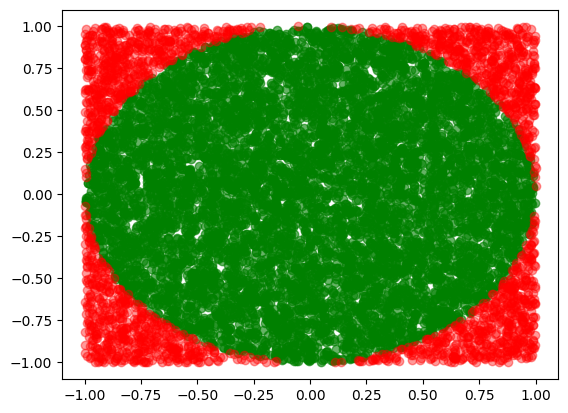

pi estimation: 3.1104, pi +/- SD: 0.016634337498079084


In [55]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(69)

def pi_estimator(r=1, num_iter=int(1e4)):
    X = np.random.uniform(-r, +r, num_iter)
    Y = np.random.uniform(-r, +r, num_iter)
    
    R2 = X**2 + Y**2

    inside = R2 < r**2
    outside = ~inside

    samples = (2*r) * (2*r) * inside

    I_hat = np.mean(samples)
    pi_hat = I_hat/r ** 2 # pi estimate
    pi_hat_sd = np.std(samples)/np.sqrt(num_iter) # pi Standard Deviation

    plt.figure()
    plt.scatter(X[inside], Y[inside], c='g', alpha=0.6)
    plt.scatter(X[outside], Y[outside], c='r', alpha=0.4)
    plt.show()

    print(f"pi estimation: {pi_hat}, pi +/- SD: {pi_hat_sd}")
    
    #print(f"X: {X}, Y: {Y}, R2: {R2}")
    #print(samples)
    #print(I_hat)


pi_estimator()

if you're working with smooth, well-behaved functions in lower dimensions, Simpson’s Rule is often more efficient. However, if you're dealing with high-dimensional integrals or complex problems where the integrand is difficult to evaluate, Monte Carlo methods are often the better choice.

# Binomial Model
---

Goes down 2 different paths usually up or down

example:

You can use a Binomial Model for Stock / Pricing options:
1) Start with a beginning value/asset: $50
2) size of up move (this is obtained by Volatility of a stock): U = 1.25
3) size of the down move is measured by: D = 1/U = 0.8
4) Probability of up move: P(U) = 0.6
5) Probability of down move: P(D) = 0.4

How do you get #4 (probability of up move)?
In other words: risk-neutral pseudo probability of an up-move

$\pi$U = (1 + Rf - D)/(U - D)

and down:

$\pi$D = 1 - $\pi$U

Assume Rf (risk free rate) is = 7%


$\pi$U = (1 + 0.07 - 0.8)/(1.25 - 0.8) = 0.6

$\pi$D = 0.4

UP: $50 \cdot 1.25 = $62.50

DOWN: $50 \cdot 0.8 = $40.00


Up and Down Factors, and Probabilities

#### **Up and Down Factors**
$$
u = \exp\left(\frac{\text{SD} \cdot \sqrt{T}}{n}\right)
$$
$$
d = \frac{1}{u} = \exp\left(-\frac{\text{SD} \cdot \sqrt{T}}{n}\right)
$$

---

#### **Probability of an Upward Move**
$$
p = \frac{1}{2} + \frac{1}{2} \cdot \frac{\mu}{\text{SD}} \cdot \sqrt{\frac{T}{n}}
$$

---

#### **Probability of a Downward Move**
$$
1 - p = \frac{1}{2} - \frac{1}{2} \cdot \frac{\mu}{\text{SD}} \cdot \sqrt{\frac{T}{n}}
$$

T is the length of prediction in years, and n is the number of time steps

In [14]:
import numpy as np
import matplotlib.pyplot as plt

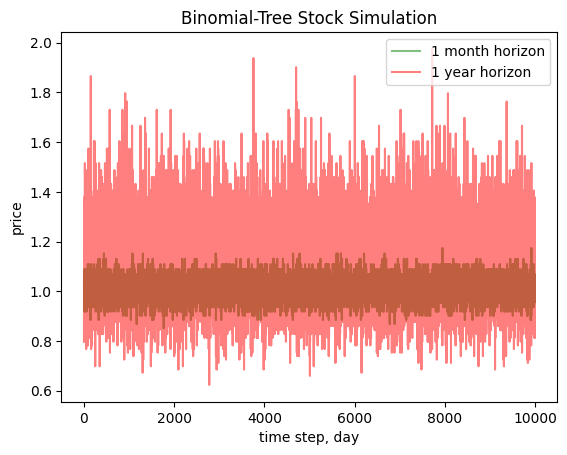

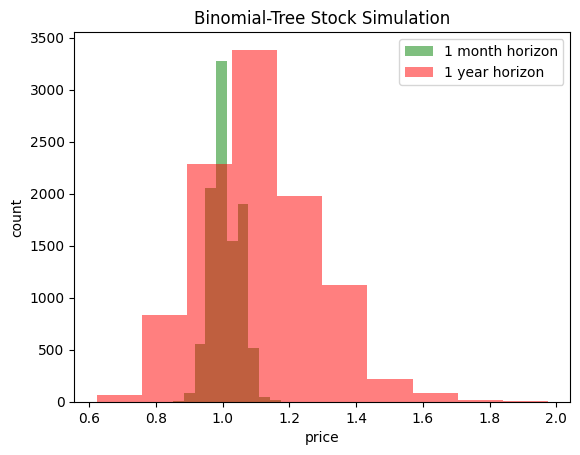

In [50]:
# mu = mean
# sigma = volatility
# S0 = startpoint
# N = # of simulations
# T = Time horizon in years
# step = time step in years

# 252 days in a stock year
# 21.0 1 month (21 days)
# 21.0/252 1 day

# np.random.seed(69)

def binomial_tree(mean, sigma, S0, N, T, step):
    # up/down and probability
    u = np.exp(sigma * np.sqrt(step))
    d = 1.0/u
    p = 0.5+0.5*(mean/sigma)*np.sqrt(step)

    # binomial tree
    up_times = np.zeros((N, len(T)))
    down_times = np.zeros((N, len(T)))
    for idx in range(len(T)):
        up_times[:,idx] = np.random.binomial(T[idx]/step, p, N)
        down_times[:,idx] = T[idx]/step - up_times[:,idx]

    # terminal price
    ST = S0 * u**up_times * d**down_times

    plt.figure()
    plt.plot(ST[:,0], color='g', alpha=0.5, label='1 month horizon')
    plt.plot(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
    plt.xlabel('time step, day')
    plt.ylabel('price')
    plt.title('Binomial-Tree Stock Simulation')
    plt.legend()
    plt.show()

    plt.figure()
    plt.hist(ST[:,0], color='g', alpha=0.5, label='1 month horizon')
    plt.hist(ST[:,1], color='r', alpha=0.5, label='1 year horizon')
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('Binomial-Tree Stock Simulation')
    plt.legend()
    plt.show()

# mean, sigma, S0, N, T, step
binomial_tree(0.1, 0.15, 1, 10000, [21.0/252, 1.0], 1.0/252)

In [48]:
d = np.array([[1,1], [0,2]])
print(d[:, 0])

[1 0]


# Self avoid random walk

A grid with 4 directions up, down, left, right each direction represents a 1 if grid is occupied and 0 otherwise

In [90]:
!pip install seaborn
import pip
pip.main(['install','seaborn']) # not recommended works for now !pip install wasn't working couldn't find Module

import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable

Collecting seaborn

Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from seaborn) (1.26.3)

Requirement already satisfied: pandas>=1.2 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from seaborn) (2.2.2)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from seaborn) (3.8.2)

Requirement already satisfied: contourpy>=1.0.1 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.0)

Requirement already satisfied: cycler>=0.10 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.47.2)

Requirement already satisfied: kiwisolver>=1.3.1 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (23.2)

Requirement already satisfied: pillow>=8 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.2.0)

Requirement already satisfied: pyparsing>=2.3.1 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.1)

Requirement already satisfied: python-dateutil>=2.7 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.8.2)

Requirement already satisfied: importlib-resources>=3.2.0 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (6.1.1)

Requirement already satisfied: pytz>=2020.1 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from pandas>=1.2->seaborn) (2023.3.post1)

Requirement already satisfied: tzdata>=2022.7 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: zipp>=3.1.0 in /Users/mathias/Library/Python/3.9/lib/python/site-packages (from importlib-resources>=3.2.0->matplotlib!=3.6.1,>=3.4->seaborn) (3.17.0)

Requirement already satisfied: six>=1.5 in /Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.15.0)

Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

Installing collected packages: seaborn

Successfully installed seaborn-0.13.2

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip

iter 0, trial: 0
iter 0, trial: 1
iter 0, trial: 2
iter 0, trial: 3
iter 0, trial: 4
iter 0, trial: 5
iter 0, trial: 6
iter 0, trial: 7
iter 0, trial: 8
iter 0, trial: 9
iter 0, trial: 10
iter 0, trial: 11
iter 0, trial: 12
iter 0, trial: 13
iter 0, trial: 14
iter 0, trial: 15
iter 0, trial: 16
iter 0, trial: 17
iter 0, trial: 18
iter 0, trial: 19
iter 0, trial: 20
iter 0, trial: 21
iter 0, trial: 22
iter 0, trial: 23
iter 0, trial: 24
iter 0, trial: 25
iter 0, trial: 26
iter 0, trial: 27
iter 0, trial: 28
iter 0, trial: 29
iter 0, trial: 30
iter 0, trial: 31
iter 0, trial: 32
iter 0, trial: 33
iter 0, trial: 34
iter 0, trial: 35
iter 0, trial: 36
iter 0, trial: 37
iter 1, trial: 0
iter 1, trial: 1
iter 1, trial: 2
iter 1, trial: 3
iter 1, trial: 4
iter 1, trial: 5
iter 1, trial: 6
iter 2, trial: 0
iter 2, trial: 1
iter 3, trial: 0
iter 3, trial: 1
iter 3, trial: 2
iter 3, trial: 3
iter 3, trial: 4
iter 3, trial: 5
iter 3, trial: 6
iter 3, trial: 7
iter 3, trial: 8
iter 3, trial: 9
ite

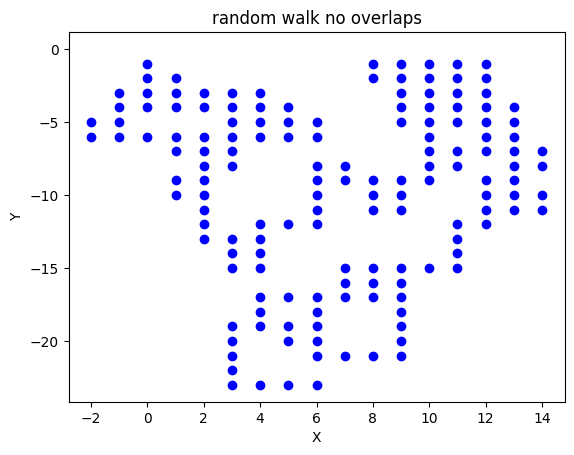

<Figure size 640x480 with 0 Axes>

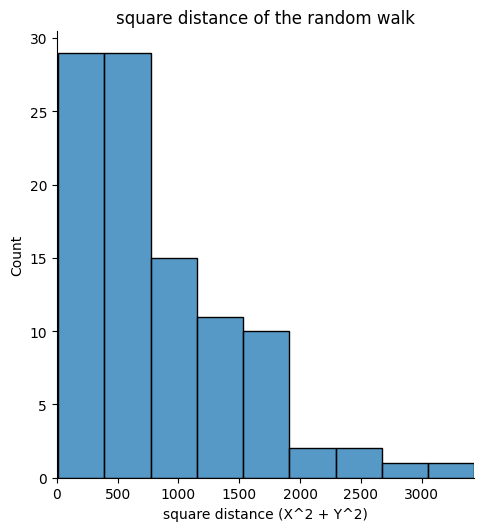

In [100]:
def rand_walk(num_step, num_iter, moves):
    square_dist = np.zeros(num_iter)
    weights = np.zeros(num_iter)
    for it in range(num_iter):
        trial = 0
        i = 1
        # iterate until non-crossing walk
        while i != num_step-1:
            X,Y = 0,0
            weight = 1
            lattice = np.zeros((2*num_step+1, 2*num_step+1))
            #print(f"before lattice {lattice}")
            lattice[num_step+1, num_step+1] = 1
            #print(f"after lattice {lattice}")
            path = np.array([0,0])
            xx = num_step + 1 + X
            yy = num_step + 1 + Y
            #print(f"xx {xx} yy {yy}")

            print(f"iter {it}, trial: {trial}")

            for i in range(num_step):
                up = lattice[xx,yy+1]
                down = lattice[xx,yy-1]
                left = lattice[xx-1,yy]
                right = lattice[xx+1,yy]

                #print(f"up {up} down {down} left {left} right {right}")

                neighbors = np.array([1,1,1,1]) - np.array([up, down, left, right])
                #print(f"neighbors {neighbors}, sum: {np.sum(neighbors)}")

                if (np.sum(neighbors) == 0):
                    i = 1
                    break
                    
                weight = weight * np.sum(neighbors)
                # samples a move direction
                direction = np.where(np.random.rand() < np.cumsum(neighbors/float(sum(neighbors))))
                #print(f"direction {direction}")

                X = X + moves[direction[0][0], 0]
                Y = Y + moves[direction[0][0], 1]

                path_new = np.array([X,Y])
                path = np.vstack([path, path_new])

                xx = num_step + 1 + X
                yy = num_step + 1 + Y
                lattice[xx,yy] = 1
            trial = trial + 1

        square_dist[it] = X**2 + Y**2
        weights[it] = weight
    mean_square_dist = np.mean(weights * square_dist)/np.mean(weights)
    print(f"mean square dist: {mean_square_dist}")

    plt.figure()
    for i in range(num_step-1):
        plt.plot(path[i,0], path[i,1], path[i+1,0], path[i+1,1], 'ob')
    plt.title('random walk no overlaps')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure()
    sns.displot(square_dist)
    plt.xlim(0, np.max(square_dist))
    plt.title('square distance of the random walk')
    plt.xlabel('square distance (X^2 + Y^2)')
    plt.show()

                

# np.array(up, down, left, right)
rand_walk(150, 100, np.array([[0,1],[0,-1],[-1,0],[1,0]]))

# Gibbs Sampling
---
is another MCMC algorithm

first, A joint distribution represents probabilities of two or more random variables occuring simultaneously:
P(x,y)

Gibbs sampling will give us conditional probabilities:


sampling from x: P(X|Y), sampling from y: P(Y|X)

We use Gibbs because joint distribution is hard or set of variables is difficult to compute or sample directly, this breaks the problem up in smaller chunks. It approximates the joint.

### Step 1 Joint Distribution
---
The joint distribution \( P(x, y) \) is:

| \( x \) | \( y \) | \( P(x, y) \) |
|--------|--------|---------------|
| 0      | 0      | 0.1           |
| 0      | 1      | 0.4           |
| 1      | 0      | 0.2           |
| 1      | 1      | 0.3           |

---

### Step 2 Marginal probabilities
For y:\
P(y = 0) = P(x = 0, y = 0) + P(x = 1, y = 0) = 0.1 + 0.2 = 0.3\
P(y = 1) = P(x = 0, y = 1) + P(x = 1, y = 1) = 0.4 + 0.3 = 0.7
For x:\
P(x = 0) = P(x = 0, y = 0) + P(x = 0, y = 1) = 0.1 + 0.4 = 0.5\
P(x = 1) = P(x = 1, y = 1) + P(x = 1, y = 1) = 0.2 + 0.3 = 0.5

---

### Step 3 Conditional probabilities
formula:\
P(x | y ) = P(x,y)/P(y) and P(y | x) = P(x,y)/P(x)

For y = 0:\
P(x = 0|y = 0) = P(x = 0, y = 0)/P(y = 0) = 0.1/0.3 = 0.33\
P(x = 1|y = 0) = P(x = 1, y = 0)/P(y = 0) = 0.2/0.3 = 0.67

For y = 1:\
P(x = 0|y = 1) = P(x = 0, y = 1)/P(y = 1) = 0.4/0.7 = 0.57\
P(x = 1|y = 1) = P(x = 1, y = 1)/P(y = 1) = 0.3/0.7 = 0.43

For x = 0:\
P(y = 0|x = 0) = P(x = 0, y = 0)/P(x = 0) = 0.1/0.5 = 0.2\
P(y = 1|x = 0) = P(x = 0, y = 1)/P(x = 0) = 0.4/0.5 = 0.8

For x = 1:\
P(y = 0|x = 1) = P(x = 1, y = 0)/P(x = 1) = 0.2/0.5 = 0.4\
P(y = 1|x = 1) = P(x = 1, y = 1)/P(x = 1) = 0.3/0.5 = 0.6

---

### Step 4 Walk through

start with x = 0, y = 0

1. **Iteration 1**:
   - Sample x given y = 0:
   - P(x = 0|y = 0) = 0.33, P(x = 1|y = 0) = 0.67
   - Random draw gives x = 1
   - Sample y given x = 1:
   - P(y = 0|x = 1) = 0.4, P(y = 1|x = 1) = 0.6
   - Random draw gives y = 1

2. **Iteration 2**:
   - Sample x given y = 1:
   - P(x = 0|y = 1) = 0.57, P(x = 1|y = 1) = 0.43
   - Random draw gives x = 0
   - Sample y given x = 0:
   - P(y = 0|x = 0) = 0.2, P(y = 1|x = 0) = 0.8
   - Random draw gives y = 1

3. **Iteration 3**:
    - Same results as iteration 2
  

- \( (x = 0, y = 0) \): Appears 0 times.
- \( (x = 0, y = 1) \): Appears 2 times.
- \( (x = 1, y = 0) \): Appears 0 times.
- \( (x = 1, y = 1) \): Appears 1 time.

---

## Step 5 observations

### Observed Probabilities

Divide the observed frequencies by the total number of iterations (3):


\begin{array}{|c|c|c|c|}
\hline
x & y & \text{Observed Frequency} & \text{Observed Probability} \\
\hline
0 & 0 & 0 & 0.00 \\
0 & 1 & 2 & 0.67 \\
1 & 0 & 0 & 0.00 \\
1 & 1 & 1 & 0.33 \\
\hline
\end{array}

---

Fully conditional distributions:\
(d = 3 dimensional distribution)

1. **Sample \( x_1^{(k+1)} \) given \( x_2^{(k)} \) and \( x_3^{(k)} \)**:
   $$
   x_1^{(k+1)} \sim p(x_1 | x_2^{(k)}, x_3^{(k)})
   $$

2. **Sample \( x_2^{(k+1)} \) given \( x_1^{(k+1)} \) and \( x_3^{(k)} \)**:
   $$
   x_2^{(k+1)} \sim p(x_2 | x_1^{(k+1)}, x_3^{(k)})
   $$

3. **Sample \( x_3^{(k+1)} \) given \( x_1^{(k+1)} \) and \( x_2^{(k+1)} \)**:
   $$
   x_3^{(k+1)} \sim p(x_3 | x_1^{(k+1)}, x_2^{(k+1)})
   $$

This process is repeated iteratively to generate samples that approximate the joint distribution \( p(x_1, x_2, x_3) \).

---

The squared Mahalanobis distance is defined as:

$$
D^2(x, \mu) = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

Where:
- \( x \) is the data point (a vector).
- \( \mu \) is the mean vector.
- \( \Sigma^{-1} \) is the inverse of the covariance matrix.
- \( (x - \mu)^T \) is the transpose of \( x - \mu \).

This distance measure captures how far a point is from the mean, considering the correlation structure of the distribution.

---

The PDF of a multivariate Gaussian distribution is:

$$
p(\mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

Where:
- \( x \) is the random vector (the point in \( d \)-dimensional space).
- \( \mu \) is the mean vector.
- \( \Sigma \) is the covariance matrix.
- \( |\Sigma| \) is the determinant of the covariance matrix.
- \( \Sigma^{-1} \) is the inverse of the covariance matrix.
- \( (x - \mu)^T \) is the transpose of \( x - \mu \).
- The expression \( (x - \mu)^T \Sigma^{-1} (x - \mu) \) is the squared Mahalanobis distance.

This formula describes the likelihood of observing a particular vector \( \mathbf{x} \) in a multivariate Gaussian distribution.

In [ ]:
import itertools
from numpy.linalg import inv
from scipy.stats import multivariate_normal

class gibbs_gauss:
    def gauss_conditional(self, mu, sigma, setA, x):
        dim = len(mu)
        setU = set(range(dim))
        setB = setU.difference(setA)
        muA = np.array([mu[item] for item in setA]).reshape(-1,1)
        muB = np.array([mu[item] for item in setB]).reshape(-1,1)
        xB = np.array([x[item] for item in setB]).reshape(-1,1)

gg = gibbs.gauss()